# Exploratory Notebook

# Testimonal for Microsoft's New Visual Studio

This project is a representation of a suppositional scenario in which Microsoft is entering a business of creating movies. I as a Data Scientist is assigned to help Microsoft decide what type of film they should be creating by translating my findings into actionable insights.

In this notebook I am going to explore the relationship between movie's success and movie's finance, movie's genre, movie's runtime and production budget profit. It is my decision to use profit and gross as the predominant indicators of success.  

In [517]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns 
pd.set_option('display.max_rows', 100) 

In [518]:
import sqlite3

In [519]:
con = sqlite3.connect('../zippedData/mahum_db.db')

In [520]:
cursor = con.cursor()

In [521]:
movies_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

movies_df.head(10)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [522]:
movie_akas = \
"""
SELECT *
FROM movie_akas
"""

In [523]:
movie_df = pd.read_sql("""

SELECT *
FROM movie_akas

""", con)

movie_df.head(21)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [524]:
movie_basics = \
"""
SELECT *
FROM movie_basics
"""

In [525]:
movie_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

movie_df.head(21)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [526]:
cursor.execute(movie_basics)

In [527]:
cursor.fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [528]:
cursor.description

(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

In [529]:
movies_df = pd.read_sql(movie_basics, con)
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [530]:
#identifying duplicates
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(movie_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                                                                    24
Broken                                                                  20
The Return                                                              20
Alone                                                                   16
Homecoming                                                              16
                                                                        ..
Marvel Knights: Spider-Man                                               1
Avocat de la Loi                                                         1
El Coyote                                                                1
Walls and the Tiger                                                      1
The Silent Killer: Prostate Cancer in the African American Community     1
Name: primary_title, Length: 136071, dtype: int64

In [531]:
movie_df.reset_index(inplace=True)
movie_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
movie_df


,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [532]:
#creating a new dataframe for duplicate movie titles
title_vcs = pd.Series(movie_df['primary_title'].value_counts())
movie_title = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
movie_title_df = movie_df[movie_df['primary_title'].isin(movie_title)].copy()
movie_title_df


,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [533]:
movie_title_df['updated_title'] = movie_title_df['primary_title'] + ' ' + movie_title_df['start_year'].astype(str)
movie_title_df

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


In [534]:
determine_dupes(movie_title_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
Untitled 2017                                  4
Escape from Candyland 2017                     4
                                              ..
Scars 2018                                     1
The Jungle Book 2016                           1
The People the Rain Forgot 2011                1
Journey to the South 2018                      1
Don Juan 2011                                  1
Name: updated_title, Length: 14183, dtype: int64

In [535]:
#removing the columns that we need to merge and do not want to dupliacte
remove_columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'genres', 'runtime_minutes']
movie_title_df.drop(columns=remove_columns, inplace=True)
movie_title_df


,g_unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


In [536]:
#merging movie_df and movie_title_df
movie_and_title_df = pd.merge(left=movie_df, right=movie_title_df, on=['g_unique_id'], how ='left')
movie_and_title_df.head(10)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


In [537]:
#this will take couple min to load
movie_and_title_df['title_NaN'] = movie_and_title_df['updated_title'].isnull()
movie_and_title_df.head(16)
for movie_index in list(range(len(movie_and_title_df.index))):
    if ~movie_and_title_df.loc[movie_index, 'title_NaN']:
        movie_and_title_df.loc[movie_index, 'primary_title'] = movie_and_title_df.loc[movie_index, 'updated_title']
movie_and_title_df.head(16)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


In [538]:
#removing unwanted columns
remove_columns = ['g_unique_id','updated_title', 'title_NaN']
movie_and_title_df.drop(columns=remove_columns, inplace=True)


In [539]:
movie_and_title_df = movie_and_title_df.copy()
display(movie_and_title_df.head(16))
movie_and_title_df.info()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


In [540]:
!ls ../zippedData

bom.movie_gross.csv.gz
im.db.zip
mahum_db
mahum_db.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [541]:
#reading csv
bom_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
rt_info_df = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews_df = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [542]:
#using bom grosstable
bom_gross_df.head(10)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [543]:
bgross_df = bom_gross_df

In [544]:
bgross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [545]:
determine_dupes(bgross_df['title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Bluebeard                               2
Abduction                               1
The Stroller Strategy                   1
The Shack                               1
Mr. X                                   1
                                       ..
Before I Fall                           1
Looper                                  1
Judy Moody and the NOT Bummer Summer    1
Knight & Day                            1
Elena                                   1
Name: title, Length: 3386, dtype: int64

In [546]:
#using rotten tomato table
rt_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [547]:
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [548]:
rt_df = rt_info_df.copy()

In [549]:
rt_df.drop(columns='id', inplace=True)

In [550]:
#removing unwanted columns
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', ]
rt_df.drop(columns=remove_columns, inplace=True)

In [551]:
rt_df

,genre,director,box_office,runtime,studio
0,Action and Adventure|Classics|Drama,William Friedkin,NaN,104 minutes,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",108 minutes,Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,NaN,116 minutes,NaN
3,Drama|Mystery and Suspense,Barry Levinson,NaN,128 minutes,NaN
4,Drama|Romance,Rodney Bennett,NaN,200 minutes,NaN
...,...,...,...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,NaN,"33,886,034",106 minutes,New Line Cinema
1556,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,88 minutes,Paramount Vantage
1557,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,101 minutes,NaN


In [552]:
rt_df.rename(columns={'genre' : 'genres'}, inplace=True)
display(rt_df)

,genres,director,box_office,runtime,studio
0,Action and Adventure|Classics|Drama,William Friedkin,NaN,104 minutes,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",108 minutes,Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,NaN,116 minutes,NaN
3,Drama|Mystery and Suspense,Barry Levinson,NaN,128 minutes,NaN
4,Drama|Romance,Rodney Bennett,NaN,200 minutes,NaN
...,...,...,...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,NaN,"33,886,034",106 minutes,New Line Cinema
1556,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,88 minutes,Paramount Vantage
1557,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,101 minutes,NaN


In [553]:
tmdb_movies_df 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [554]:
tn_movie_budgets_df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [555]:
#renaming
finance_df = tn_movie_budgets_df

In [556]:
#function for cleaning
def clean_a_money_column(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

In [557]:
#cleaning
finance_df = clean_a_money_column(finance_df,'worldwide_gross')
finance_df = clean_a_money_column(finance_df,'domestic_gross')
finance_df = clean_a_money_column(finance_df,'production_budget')
display(finance_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [558]:
finance_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [559]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [560]:
# finance_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin

numerator = finance_df['worldwide_gross'] - finance_df['production_budget']
finance_df['profit_margin'] = (numerator*100)/finance_df['worldwide_gross']
finance_df.loc[finance_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
finance_df['ROI'] = finance_df['worldwide_gross']/finance_df['production_budget']


In [561]:
finance_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


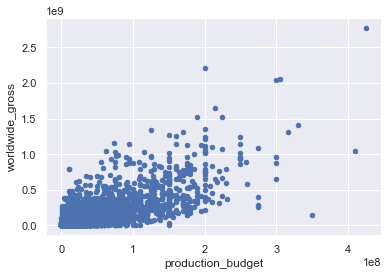

In [562]:
#scatter plot
finance_df.plot('production_budget', 'worldwide_gross', kind='scatter');

In [563]:
finance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [564]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [565]:
#dropping 'id column'
finance_df.drop(columns='id', inplace=True)


In [566]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 316.3+ KB


In [567]:
finance_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070


In [568]:
finance_df['Year'] = pd.to_numeric(finance_df['release_date'].map(lambda x: x[-4:]))
finance_df['Month'] = finance_df['release_date'].map(lambda x: x[:3])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


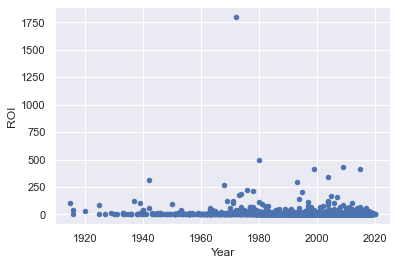

In [569]:
finance_df.plot('Year' , 'ROI',  kind = 'scatter');

In [570]:
finance_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec
...,...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep


In [571]:
#functions to pull years, months out of the data set. Can also be used for other column types?
#for now, use int types for the year
def year_iso (df, year):
    output_df = df[df['Year'] == year]
    return output_df
#for now, with money_metrics_df, use three letter abreviations for months
def month_iso (df, month):
    output_df = df[df['Month'] == month]
    return output_df

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


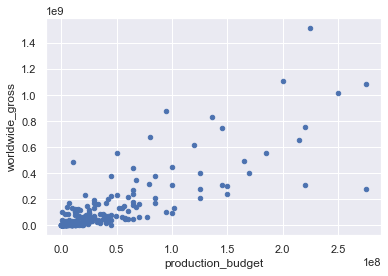

In [572]:
fddf_2015 = year_iso(finance_df, 2012)

fddf_2015.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


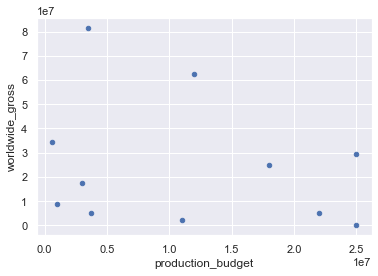

In [573]:
fddf_1999 = year_iso(finance_df, 1970)

fddf_1999.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

In [574]:
determine_dupes(finance_df['movie'])


Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


King Kong                        3
Home                             3
Halloween                        3
The Jungle Book                  2
Alice in Wonderland              2
                                ..
Win a Date with Tad Hamilton!    1
Elephant                         1
Trust the Man                    1
Grosse Pointe Blank              1
Elf                              1
Name: movie, Length: 5698, dtype: int64

In [575]:
#Automating year pull outs on money_metrics_df, not sure the best way to do this, but for now, list of dataframes?
year_range = list(range(1915,2021))
year_range
year_keys = []
for i in year_range:
    keystring = ''
    keystring = str(i) + ' money_metric_df'
    year_keys.append(keystring)

list_of_dfs_years = []
for i in year_range:
    df_out = year_iso (finance_df, i)
    list_of_dfs_years.append(df_out)
    
years_and_dfs = dict(zip(year_keys,list_of_dfs_years))

years_and_dfs['2019 money_metric_df']
#okay, now we just gotta join things

years_and_dfs.keys()

dict_keys(['1915 money_metric_df', '1916 money_metric_df', '1917 money_metric_df', '1918 money_metric_df', '1919 money_metric_df', '1920 money_metric_df', '1921 money_metric_df', '1922 money_metric_df', '1923 money_metric_df', '1924 money_metric_df', '1925 money_metric_df', '1926 money_metric_df', '1927 money_metric_df', '1928 money_metric_df', '1929 money_metric_df', '1930 money_metric_df', '1931 money_metric_df', '1932 money_metric_df', '1933 money_metric_df', '1934 money_metric_df', '1935 money_metric_df', '1936 money_metric_df', '1937 money_metric_df', '1938 money_metric_df', '1939 money_metric_df', '1940 money_metric_df', '1941 money_metric_df', '1942 money_metric_df', '1943 money_metric_df', '1944 money_metric_df', '1945 money_metric_df', '1946 money_metric_df', '1947 money_metric_df', '1948 money_metric_df', '1949 money_metric_df', '1950 money_metric_df', '1951 money_metric_df', '1952 money_metric_df', '1953 money_metric_df', '1954 money_metric_df', '1955 money_metric_df', '1956

In [576]:
jan_fddf = month_iso(finance_df,'Jan')
feb_fddf = month_iso(finance_df,'Feb')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


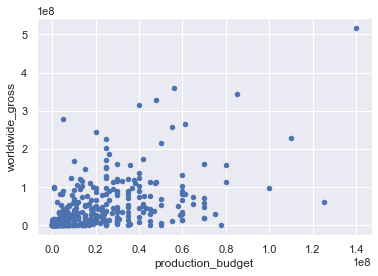

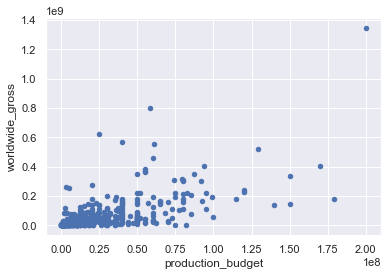

In [577]:
jan_fddf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
feb_fddf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
#To compare months, for example

In [578]:
finance_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec
...,...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep


In [579]:
finance_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec
...,...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep


In [580]:
determine_dupes(finance_df['movie'])

Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


King Kong                        3
Home                             3
Halloween                        3
The Jungle Book                  2
Alice in Wonderland              2
                                ..
Win a Date with Tad Hamilton!    1
Elephant                         1
Trust the Man                    1
Grosse Pointe Blank              1
Elf                              1
Name: movie, Length: 5698, dtype: int64

In [581]:
finance_df.reset_index(inplace=True)
finance_df.rename(columns={'index' : 'finance_unique_id'}, inplace=True)
finance_df

,finance_unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May
4,4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec
...,...,...,...,...,...,...,...,...,...,...
5777,5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec
5778,5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr
5779,5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul
5780,5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep


In [582]:
title_vcs = pd.Series(finance_df['movie'].value_counts())
finance_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
finance_dupes_df = finance_df[finance_df['movie'].isin(finance_dupes)].copy()
# finance_dupes_df


In [583]:
finance_dupes_df['updated_title'] = finance_dupes_df['movie'] + ' ' + finance_dupes_df['Year'].astype(str)

In [584]:
determine_dupes(finance_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Home 2009                         2
Beauty and the Beast 1991         1
Death at a Funeral 2010           1
Planet of the Apes 1968           1
Halloween 1978                    1
                                 ..
Death at a Funeral 2007           1
Day of the Dead 2008              1
A Nightmare on Elm Street 2010    1
Hamlet 2000                       1
Heist 2015                        1
Name: updated_title, Length: 164, dtype: int64

In [585]:
remove_columns = ['movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'Year', 'Month','release_date']
finance_dupes_df.drop(columns=remove_columns, inplace=True)
# finance_dupes_df

In [586]:
finance_dupes_df

,finance_unique_id,updated_title
26,26,The Avengers 2012
38,38,Robin Hood 2010
39,39,King Kong 2005
50,50,Alice in Wonderland 2010
64,64,The Mummy 2017
...,...,...
5668,5668,Cat People 1942
5676,5676,Night of the Living Dead 1968
5677,5677,The Birth of a Nation 1915
5699,5699,The Last House on the Left 1972


In [587]:
finance_and_dupes_df = pd.merge(left=finance_df, right=finance_dupes_df, on=['finance_unique_id'], how ='left')

In [588]:
finance_and_dupes_df['title_NaN'] = finance_and_dupes_df['updated_title'].isnull()
finance_and_dupes_df.head(25)
for movie_index in list(range(len(finance_and_dupes_df.index))):
     if ~finance_and_dupes_df.loc[movie_index, 'title_NaN']:
        finance_and_dupes_df.loc[movie_index, 'movie'] = finance_and_dupes_df.loc[movie_index, 'updated_title']

In [589]:
finance_and_dupes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   finance_unique_id  5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
 8   Year               5782 non-null   int64  
 9   Month              5782 non-null   object 
 10  updated_title      165 non-null    object 
 11  title_NaN          5782 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 707.7+ KB


In [590]:
remove_columns = ['finance_unique_id','updated_title', 'title_NaN']
finance_and_dupes_df.drop(columns=remove_columns, inplace=True)


In [591]:
finance_and_dupes_df = finance_and_dupes_df.copy()
display(finance_and_dupes_df.head(21))
finance_and_dupes_df.info()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015,Dec
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,Apr
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007,May
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017,Nov
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015,Nov


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   Year               5782 non-null   int64  
 8   Month              5782 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 611.7+ KB


In [592]:
#merging tn movie data with imdb basic title
movie_and_title_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(movie_and_title_df)

,movie_id,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [593]:
 fd_and_mt_df = pd.merge(left=finance_and_dupes_df, right=movie_and_title_df, on='movie', how ='left')


In [594]:
fd_and_mt_df.loc[fd_and_mt_df['movie'] == 'Avatar', 'genres'] = "Action,Adventure,Fantasy"


In [595]:
unaltered_mmt_df = movie_df.copy()
unaltered_mmt_df.rename(columns={'primary_title' : 'movie'}, inplace=True)

In [596]:
fd_and_mt_df = fd_and_mt_df.copy()

In [597]:
fd_and_mt_df = pd.merge(left=fd_and_mt_df, right=unaltered_mmt_df, on='movie', how ='left')


In [598]:
display(fd_and_mt_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6966 entries, 0 to 6965
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6966 non-null   object 
 1   movie              6966 non-null   object 
 2   production_budget  6966 non-null   int64  
 3   domestic_gross     6966 non-null   int64  
 4   worldwide_gross    6966 non-null   int64  
 5   profit_margin      6966 non-null   float64
 6   ROI                6966 non-null   float64
 7   Year               6966 non-null   int64  
 8   Month              6966 non-null   object 
 9   movie_id_x         1764 non-null   object 
 10  original_title_x   1764 non-null   object 
 11  start_year_x       1764 non-null   float64
 12  runtime_minutes_x  1663 non-null   float64
 13  genres_x           1749 non-null   object 
 14  g_unique_id        3423 non-null   float64
 15  movie_id_y         3423 non-null   object 
 16  original_title_y   3422 

None

In [599]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id_x,original_title_x,start_year_x,runtime_minutes_x,genres_x,g_unique_id,movie_id_y,original_title_y,start_year_y,runtime_minutes_y,genres_y
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy",17060.0,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6448.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",112147.0,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",39010.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",127755.0,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",28674.0,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [600]:
determine_dupes(fd_and_mt_df['movie'])

Amount of unique duplicate movie title: 533
Total amount of duplicate movie titles: 1718


The Return                        20
Freedom                           14
The Journey                       11
The Promise                       10
Trapped                           10
                                  ..
The Girl in the Spiderâs Web     1
Atlantis: The Lost Empire          1
Cinco de Mayo, La Batalla          1
Fright Night                       1
Elf                                1
Name: movie, Length: 5781, dtype: int64

In [601]:
fd_and_mt_df['is_movie_id_x_NaN'] = fd_and_mt_df['movie_id_x'].isnull()
fd_and_mt_df['is_movie_id_y_NaN'] = fd_and_mt_df['movie_id_y'].isnull()

for movie_index in list(range(len(fd_and_mt_df.index))):
    if (fd_and_mt_df.loc[movie_index, 'is_movie_id_x_NaN']) and (~fd_and_mt_df.loc[movie_index, 'is_movie_id_y_NaN'])\
        and (fd_and_mt_df.loc[movie_index, 'start_year_y'].astype('int64') == fd_and_mt_df.loc[movie_index, 'Year']):
            fd_and_mt_df.loc[movie_index, 'movie_id_x'] = fd_and_mt_df.loc[movie_index, 'movie_id_y']
            fd_and_mt_df.loc[movie_index, 'original_title_x'] = fd_and_mt_df.loc[movie_index, 'original_title_y']
            fd_and_mt_df.loc[movie_index, 'start_year_x'] = fd_and_mt_df.loc[movie_index, 'start_year_y']
            fd_and_mt_df.loc[movie_index, 'genres_x'] = fd_and_mt_df.loc[movie_index, 'genres_y']

In [602]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id_x,original_title_x,start_year_x,runtime_minutes_x,genres_x,g_unique_id,movie_id_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,is_movie_id_x_NaN,is_movie_id_y_NaN
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy",17060.0,tt1775309,Abatâ,2011.0,93.0,Horror,False,False
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6448.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",False,False
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",112147.0,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",False,False
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",39010.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",False,False
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",127755.0,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",False,False
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",28674.0,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",False,False


In [603]:
remove_columns = ['is_movie_id_x_NaN', 'is_movie_id_y_NaN', 'movie_id_y', 'original_title_y', 
                  'start_year_y','genres_y']
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

In [604]:
fd_and_mt_df.rename(columns={'movie_id_x': 'movie_id', 'original_title_x': 'original_title',
                                 'start_year_x': 'start_year', 'genres_x': 'genres'}, inplace=True)

In [605]:
display(fd_and_mt_df.head(1))
fd_and_mt_df.shape


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,original_title,start_year,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy",17060.0,93.0


(6966, 16)

In [606]:
remove_columns = ['start_year']
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

In [607]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,original_title,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec,tt1775309,Abatâ,93.0,"Action,Adventure,Fantasy",17060.0,93.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6448.0,136.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,Jun,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,May,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,Dec,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,Dec,tt7837402,Red 11,77.0,"Horror,Sci-Fi,Thriller",127755.0,77.0
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,Apr,NaN,NaN,NaN,NaN,NaN,NaN
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,Jul,NaN,NaN,NaN,NaN,NaN,NaN
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,Sep,tt2107644,A Plague So Pleasant,76.0,"Drama,Horror,Thriller",28674.0,76.0


In [608]:
bgross_df.rename(columns={'title' : 'movie'}, inplace=True)
display(bgross_df)

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [609]:
fd_mt_bg_df =pd.concat([fd_and_mt_df, bgross_df], axis=0)

In [610]:
fd_mt_bg_df 

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,original_title,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,Abatâ,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017.0,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,NaN,The Quake,NaN,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magn.,NaN,2018.0
3383,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FM,NaN,2018.0
3384,NaN,El Pacto,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sony,NaN,2018.0
3385,NaN,The Swan,NaN,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Synergetic,NaN,2018.0


In [611]:
remove_columns = ['original_title']
fd_mt_bg_df.drop(columns=remove_columns, inplace=True)

In [612]:
fd_mt_bg_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017.0,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,NaN,The Quake,NaN,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magn.,NaN,2018.0
3383,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FM,NaN,2018.0
3384,NaN,El Pacto,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sony,NaN,2018.0
3385,NaN,The Swan,NaN,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Synergetic,NaN,2018.0


In [613]:
fd_mt_bg_rt_df= pd.concat([fd_mt_bg_df, rt_df])

In [614]:
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017.0,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,New Line Cinema,NaN,NaN,NaN,"33,886,034",106 minutes
1556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy|Science Fiction and Fantasy,NaN,NaN,Paramount Vantage,NaN,NaN,Steve Barron,NaN,88 minutes
1557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classics|Comedy|Drama|Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,Gordon Douglas,NaN,111 minutes
1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy|Drama|Kids and Family|Sports and Fitness,NaN,NaN,NaN,NaN,NaN,David Mickey Evans,NaN,101 minutes


In [615]:
display(fd_mt_bg_rt_df.head(1))
fd_mt_bg_rt_df.shape


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN


(11913, 20)

In [616]:
fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11913 entries, 0 to 1559
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6966 non-null   object 
 1   movie              10353 non-null  object 
 2   production_budget  6966 non-null   float64
 3   domestic_gross     10325 non-null  float64
 4   worldwide_gross    6966 non-null   float64
 5   profit_margin      6966 non-null   float64
 6   ROI                6966 non-null   float64
 7   Year               6966 non-null   float64
 8   Month              6966 non-null   object 
 9   movie_id           2077 non-null   object 
 10  runtime_minutes_x  1663 non-null   float64
 11  genres             3610 non-null   object 
 12  g_unique_id        3423 non-null   float64
 13  runtime_minutes_y  2999 non-null   float64
 14  studio             3876 non-null   object 
 15  foreign_gross      2037 non-null   object 
 16  year               3387

In [617]:
fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['movie_id'].isna().sum()
print(f'Rows with Null Values in movie_id Column: {fd_mt_bg_rt_df_null_values}')

Rows with Null Values in movie_id Column: 9836


In [618]:
fd_mt_bg_rt_df.info

<bound method DataFrame.info of       release_date                                        movie  \
0     Dec 18, 2009                                       Avatar   
1     May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      Jun 7, 2019                                 Dark Phoenix   
3      May 1, 2015                      Avengers: Age of Ultron   
4     Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...            ...                                          ...   
1555           NaN                                          NaN   
1556           NaN                                          NaN   
1557           NaN                                          NaN   
1558           NaN                                          NaN   
1559           NaN                                          NaN   

      production_budget  domestic_gross  worldwide_gross  profit_margin  \
0           425000000.0     760507625.0     2.776345e+09      84.692106   
1           4

In [619]:
fd_mt_bg_rt_df.dropna(subset=['movie_id'], axis=0, inplace=True)

In [620]:
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",72820.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"Comedy,Drama,Horror",112803.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
6953,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,-1797.533207,0.052700,1996.0,Apr,tt6616538,NaN,None,112781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6956,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"Comedy,Drama",21418.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
6961,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"Horror,Sci-Fi,Thriller",127755.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN


In [621]:
fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2077 non-null   object 
 1   movie              2077 non-null   object 
 2   production_budget  2077 non-null   float64
 3   domestic_gross     2077 non-null   float64
 4   worldwide_gross    2077 non-null   float64
 5   profit_margin      2077 non-null   float64
 6   ROI                2077 non-null   float64
 7   Year               2077 non-null   float64
 8   Month              2077 non-null   object 
 9   movie_id           2077 non-null   object 
 10  runtime_minutes_x  1663 non-null   float64
 11  genres             2058 non-null   object 
 12  g_unique_id        2041 non-null   float64
 13  runtime_minutes_y  1926 non-null   float64
 14  studio             0 non-null      object 
 15  foreign_gross      0 non-null      object 
 16  year               0 non

In [622]:
display(fd_mt_bg_rt_df.head(100))
display(fd_mt_bg_rt_df.info())
pd.set_option('display.max_columns', None)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",72820.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN
8,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,54.264473,2.186484,2017.0,Nov,tt0974015,120.0,"Action,Adventure,Fantasy",515.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN
9,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,65.894399,2.932070,2015.0,Nov,tt2379713,148.0,"Action,Adventure,Thriller",38376.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN
10,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,74.641268,3.943415,2012.0,Jul,tt1345836,164.0,"Action,Thriller",6900.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN
11,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,30.052383,1.429641,2018.0,May,tt3778644,135.0,"Action,Adventure,Fantasy",66299.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
12,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-5.768370,0.945462,2013.0,Jul,tt1210819,150.0,"Action,Adventure,Western",5898.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2077 non-null   object 
 1   movie              2077 non-null   object 
 2   production_budget  2077 non-null   float64
 3   domestic_gross     2077 non-null   float64
 4   worldwide_gross    2077 non-null   float64
 5   profit_margin      2077 non-null   float64
 6   ROI                2077 non-null   float64
 7   Year               2077 non-null   float64
 8   Month              2077 non-null   object 
 9   movie_id           2077 non-null   object 
 10  runtime_minutes_x  1663 non-null   float64
 11  genres             2058 non-null   object 
 12  g_unique_id        2041 non-null   float64
 13  runtime_minutes_y  1926 non-null   float64
 14  studio             0 non-null      object 
 15  foreign_gross      0 non-null      object 
 16  year               0 non

None

In [623]:
remove_columns = ['g_unique_id']
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

In [624]:
fd_mt_bg_rt_df['release_month'] = pd.DatetimeIndex(fd_mt_bg_rt_df['release_date']).month

In [625]:
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime,release_month
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",93.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",136.0,NaN,NaN,NaN,NaN,NaN,NaN,5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",113.0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",141.0,NaN,NaN,NaN,NaN,NaN,NaN,5
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",149.0,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"Comedy,Drama,Horror",70.0,NaN,NaN,NaN,NaN,NaN,NaN,4
6953,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,-1797.533207,0.052700,1996.0,Apr,tt6616538,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
6956,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"Comedy,Drama",95.0,NaN,NaN,NaN,NaN,NaN,NaN,1
6961,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"Horror,Sci-Fi,Thriller",77.0,NaN,NaN,NaN,NaN,NaN,NaN,12


In [626]:
fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['genres'].isna().sum()
print(f'Rows with Null Values in genres Column: {fd_mt_bg_rt_df_null_values}')
NaN_in_fd_mt_bg_rt_df = fd_mt_bg_rt_df[fd_mt_bg_rt_df['genres'].isnull()]
NaN_in_fd_mt_bg_rt_df


Rows with Null Values in genres Column: 19


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime,release_month
447,"Nov 21, 2018",Robin Hood 2018,99000000.0,30824628.0,84747441.0,-16.817687,0.856035,2018.0,Nov,tt6858500,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1178,"Jun 4, 1999",Instinct,55000000.0,34105207.0,34105207.0,-61.265698,0.620095,1999.0,Jun,tt4551096,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1409,"Oct 18, 2002",The Ring,48000000.0,129094024.0,248218486.0,80.662198,5.171218,2002.0,Oct,tt10453170,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1489,"Mar 19, 2010",The Bounty Hunter,45000000.0,67061228.0,135808837.0,66.865190,3.017974,2010.0,Mar,tt1472211,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3197,"Mar 31, 2004",The Touch,20000000.0,0.0,5918742.0,-237.909644,0.295937,2004.0,Mar,tt6962340,48.0,None,48.0,NaN,NaN,NaN,NaN,NaN,NaN,3
3373,"Aug 22, 2014",The Prince,18000000.0,0.0,0.0,0.000000,0.000000,2014.0,Aug,tt3918106,NaN,None,71.0,NaN,NaN,NaN,NaN,NaN,NaN,8
3539,"Nov 16, 1990",Home Alone,15000000.0,285761243.0,476684675.0,96.853266,31.778978,1990.0,Nov,tt6419610,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3952,"Dec 31, 2019",Rogue City,13000000.0,0.0,0.0,0.000000,0.000000,2019.0,Dec,tt10329540,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
4215,"Oct 22, 2004",The Grudge,10000000.0,110359362.0,187281115.0,94.660433,18.728112,2004.0,Oct,tt10443830,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4713,"Jul 4, 2003",Swimming Pool,7800000.0,10130108.0,24021282.0,67.528794,3.079652,2003.0,Jul,tt6419386,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [627]:
fd_mt_bg_rt_df.dropna(subset=['genres'], axis=0, inplace=True)
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime,release_month
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",93.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",136.0,NaN,NaN,NaN,NaN,NaN,NaN,5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",113.0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",141.0,NaN,NaN,NaN,NaN,NaN,NaN,5
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",149.0,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6944,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,Dec,tt3973612,60.0,Drama,60.0,NaN,NaN,NaN,NaN,NaN,NaN,12
6949,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"Comedy,Drama,Horror",70.0,NaN,NaN,NaN,NaN,NaN,NaN,4
6956,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"Comedy,Drama",95.0,NaN,NaN,NaN,NaN,NaN,NaN,1
6961,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"Horror,Sci-Fi,Thriller",77.0,NaN,NaN,NaN,NaN,NaN,NaN,12


In [628]:
fd_mt_bg_rt_df.reset_index(inplace=True)
fd_mt_bg_rt_df.rename(columns={'index' : 'unique_id'}, inplace=True)
fd_mt_bg_rt_df


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime,release_month
0,0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",93.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",136.0,NaN,NaN,NaN,NaN,NaN,NaN,5
2,2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",113.0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",141.0,NaN,NaN,NaN,NaN,NaN,NaN,5
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",149.0,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,6944,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,Dec,tt3973612,60.0,Drama,60.0,NaN,NaN,NaN,NaN,NaN,NaN,12
2054,6949,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"Comedy,Drama,Horror",70.0,NaN,NaN,NaN,NaN,NaN,NaN,4
2055,6956,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"Comedy,Drama",95.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2056,6961,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"Horror,Sci-Fi,Thriller",77.0,NaN,NaN,NaN,NaN,NaN,NaN,12


In [629]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 47
Total amount of duplicate movie titles: 104


The Promise                              4
Home 2015                                4
Redemption                               4
Weekend                                  3
The Wall                                 3
                                        ..
Fight Valley                             1
Inferno                                  1
The Hunger Games: Mockingjay - Part 1    1
Margaret                                 1
Jackass 3D                               1
Name: movie, Length: 2001, dtype: int64

In [630]:
series_vcs = pd.Series(fd_mt_bg_rt_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)


['A Better Life',
 'Abduction',
 'Absentia',
 'Addicted',
 'After',
 'Alice in Wonderland 2010',
 'Big Eyes',
 'Brotherly Love',
 'Brothers 2015',
 'Burlesque',
 'Cinderella 2015',
 'Coco',
 'Cyrus',
 'Denial',
 'Destiny',
 'Heist 2015',
 'Hercules 2014',
 'Highway',
 'Home 2015',
 'Homefront',
 'Hush',
 'Joe',
 'Leap Year',
 'Let There Be Light',
 'Lights Out',
 'Phantom',
 'Redemption',
 'Sisters',
 'Spotlight',
 'Stronger',
 'The Artist',
 'The Call',
 'The Circle',
 'The Darkness',
 'The Family',
 'The Forest',
 'The Night Before',
 'The Prince',
 'The Promise',
 'The Square 2013',
 'The Tempest',
 'The Walk',
 'The Wall',
 'Treachery',
 'Truth or Dare',
 'Underdogs',
 'Weekend']

In [631]:
finance_df['mmdf_uni_id'] = finance_df.index


In [632]:
finance_df['Profit Margin']= (finance_df['worldwide_gross']-finance_df['production_budget'])/finance_df['worldwide_gross']
finance_df['ROI'] = (finance_df['worldwide_gross']/finance_df['production_budget'])

In [633]:
finance_df=finance_df.sort_values(['Profit Margin'], ascending=False)

In [634]:
finance_df = finance_df[finance_df['worldwide_gross'] != 0]

In [635]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 47
Total amount of duplicate movie titles: 104


The Promise                              4
Home 2015                                4
Redemption                               4
Weekend                                  3
The Wall                                 3
                                        ..
Fight Valley                             1
Inferno                                  1
The Hunger Games: Mockingjay - Part 1    1
Margaret                                 1
Jackass 3D                               1
Name: movie, Length: 2001, dtype: int64

In [636]:
fd_mt_bg_rt_df.drop_duplicates(subset="movie",
                     keep=False, inplace=True)

In [637]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 0
Total amount of duplicate movie titles: 0


Paterson                                 1
Hacksaw Ridge                            1
The Lion of Judah                        1
Orphan                                   1
Road Trip                                1
                                        ..
Fight Valley                             1
Inferno                                  1
The Hunger Games: Mockingjay - Part 1    1
Margaret                                 1
Jackass 3D                               1
Name: movie, Length: 1954, dtype: int64

In [638]:
fd_mt_bg_rt_df['genres'] = fd_mt_bg_rt_df['genres'].map(lambda x: x.split(','))


In [639]:
fd_mt_bg_rt_df.head(100)

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime,release_month
0,0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"[Action, Adventure, Fantasy]",93.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"[Action, Adventure, Fantasy]",136.0,NaN,NaN,NaN,NaN,NaN,NaN,5
2,2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"[Action, Adventure, Sci-Fi]",113.0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",141.0,NaN,NaN,NaN,NaN,NaN,NaN,5
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",149.0,NaN,NaN,NaN,NaN,NaN,NaN,4
5,8,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,54.264473,2.186484,2017.0,Nov,tt0974015,120.0,"[Action, Adventure, Fantasy]",120.0,NaN,NaN,NaN,NaN,NaN,NaN,11
6,9,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,65.894399,2.932070,2015.0,Nov,tt2379713,148.0,"[Action, Adventure, Thriller]",148.0,NaN,NaN,NaN,NaN,NaN,NaN,11
7,10,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,74.641268,3.943415,2012.0,Jul,tt1345836,164.0,"[Action, Thriller]",164.0,NaN,NaN,NaN,NaN,NaN,NaN,7
8,11,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,30.052383,1.429641,2018.0,May,tt3778644,135.0,"[Action, Adventure, Fantasy]",135.0,NaN,NaN,NaN,NaN,NaN,NaN,5
9,12,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-5.768370,0.945462,2013.0,Jul,tt1210819,150.0,"[Action, Adventure, Western]",150.0,NaN,NaN,NaN,NaN,NaN,NaN,7


In [640]:

fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2057
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          1954 non-null   int64  
 1   release_date       1954 non-null   object 
 2   movie              1954 non-null   object 
 3   production_budget  1954 non-null   float64
 4   domestic_gross     1954 non-null   float64
 5   worldwide_gross    1954 non-null   float64
 6   profit_margin      1954 non-null   float64
 7   ROI                1954 non-null   float64
 8   Year               1954 non-null   float64
 9   Month              1954 non-null   object 
 10  movie_id           1954 non-null   object 
 11  runtime_minutes_x  1642 non-null   float64
 12  genres             1954 non-null   object 
 13  runtime_minutes_y  1841 non-null   float64
 14  studio             0 non-null      object 
 15  foreign_gross      0 non-null      object 
 16  year               0 non

In [641]:
remove_columns = ['studio', 'box_office', 'director', 'foreign_gross', 'unique_id']
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

In [642]:
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,runtime_minutes_y,year,runtime,release_month
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"[Action, Adventure, Fantasy]",93.0,NaN,NaN,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"[Action, Adventure, Fantasy]",136.0,NaN,NaN,5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"[Action, Adventure, Sci-Fi]",113.0,NaN,NaN,6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",141.0,NaN,NaN,5
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",149.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,Dec,tt3973612,60.0,[Drama],60.0,NaN,NaN,12
2054,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"[Comedy, Drama, Horror]",70.0,NaN,NaN,4
2055,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"[Comedy, Drama]",95.0,NaN,NaN,1
2056,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"[Horror, Sci-Fi, Thriller]",77.0,NaN,NaN,12


In [643]:
remove_columns = ['runtime_minutes_y', 'year', 'runtime' ]
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

In [644]:
fd_mt_bg_rt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,release_month
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"[Action, Adventure, Fantasy]",12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"[Action, Adventure, Fantasy]",5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"[Action, Adventure, Sci-Fi]",6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",5
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,Dec,tt3973612,60.0,[Drama],12
2054,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"[Comedy, Drama, Horror]",4
2055,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"[Comedy, Drama]",1
2056,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"[Horror, Sci-Fi, Thriller]",12


In [645]:
fd_mt_bg_rt_df.rename(columns={'runtime_minutes_x' : 'runtime'}, inplace=True)

In [646]:
master_df = fd_mt_bg_rt_df

In [647]:
master_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"[Action, Adventure, Fantasy]",12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"[Action, Adventure, Fantasy]",5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"[Action, Adventure, Sci-Fi]",6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",5
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,Dec,tt3973612,60.0,[Drama],12
2054,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,Apr,tt6619196,70.0,"[Comedy, Drama, Horror]",4
2055,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,Jan,tt1880418,95.0,"[Comedy, Drama]",1
2056,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,Dec,tt7837402,77.0,"[Horror, Sci-Fi, Thriller]",12


In [648]:
master_df = master_df.fillna(0)

In [649]:
master_df = master_df.astype({"production_budget":'int', "domestic_gross":'int', "Year":'int', "runtime":'int'})

In [650]:
master_df.head(100)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month
0,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,84.692106,6.532577,2009,Dec,tt1775309,93,"[Action, Adventure, Fantasy]",12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,60.733080,2.546673,2011,May,tt1298650,136,"[Action, Adventure, Fantasy]",5
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-133.703598,0.427892,2019,Jun,tt6565702,113,"[Action, Adventure, Sci-Fi]",6
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,76.436443,4.243841,2015,May,tt2395427,141,"[Action, Adventure, Sci-Fi]",5
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,85.352522,6.827114,2018,Apr,tt4154756,149,"[Action, Adventure, Sci-Fi]",4
5,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,54.264473,2.186484,2017,Nov,tt0974015,120,"[Action, Adventure, Fantasy]",11
6,"Nov 6, 2015",Spectre,300000000,200074175,8.796209e+08,65.894399,2.932070,2015,Nov,tt2379713,148,"[Action, Adventure, Thriller]",11
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1.084439e+09,74.641268,3.943415,2012,Jul,tt1345836,164,"[Action, Thriller]",7
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,3.931513e+08,30.052383,1.429641,2018,May,tt3778644,135,"[Action, Adventure, Fantasy]",5
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,2.600021e+08,-5.768370,0.945462,2013,Jul,tt1210819,150,"[Action, Adventure, Western]",7


In [651]:
master_df['Profit'] = master_df['worldwide_gross'] - master_df['production_budget']

In [681]:
master_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month,Profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,84.692106,6.532577,2009,Dec,tt1775309,93,"[Action, Adventure, Fantasy]",12,2.351345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,60.733080,2.546673,2011,May,tt1298650,136,"[Action, Adventure, Fantasy]",5,6.350639e+08
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-133.703598,0.427892,2019,Jun,tt6565702,113,"[Action, Adventure, Sci-Fi]",6,-2.002376e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,76.436443,4.243841,2015,May,tt2395427,141,"[Action, Adventure, Sci-Fi]",5,1.072414e+09
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,85.352522,6.827114,2018,Apr,tt4154756,149,"[Action, Adventure, Sci-Fi]",4,1.748134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000,0,0.000000e+00,0.000000,0.000000,2014,Dec,tt3973612,60,[Drama],12,-1.500000e+04
2054,"Apr 28, 2006",Clean,10000,138711,1.387110e+05,92.790766,13.871100,2006,Apr,tt6619196,70,"[Comedy, Drama, Horror]",4,1.287110e+05
2055,"Jan 13, 2012",Newlyweds,9000,4584,4.584000e+03,-96.335079,0.509333,2012,Jan,tt1880418,95,"[Comedy, Drama]",1,-4.416000e+03
2056,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000,0.000000,2018,Dec,tt7837402,77,"[Horror, Sci-Fi, Thriller]",12,-7.000000e+03


In [702]:
def unique_f(f_series):
    unique_f_set = set()
    unique_f_list = []
    unique_f_dict = {}
    
    unique_f_set = set([f for f_list in f_series for f in f_list])
    unique_f_list = sorted(list(unique_f_set))
    unique_f_dict = {k: v for k, v in enumerate(unique_f_list)}
        
    return(unique_f_dict)

In [703]:
def movies_w_specified_genres(f_df, f_type):
    movies_for_removal = []
     
    for movie_index in list(range(len(f_df.index))):
        test_df = pd.DataFrame(f_df.iloc[movie_index]).T
        if f_type not in test_df['genres'][test_df.index[0]]:
            movies_for_removal.append(test_df['movie_id'][test_df.index[0]])
            
    for movie_for_removal in movies_for_removal:
         f_df = f_df[f_df['movie_id'] != movie_for_removal]
    
    f_df['genre'] = f_type

    return(f_df)


In [704]:

def concatenate_all_genres(master_df, unique_f_dict):
    temp_df = pd.DataFrame()
    
    for g_index in list(range(len(unique_f_dict))):
        temp_df = temp_df.append(movies_w_specified_genres(master_df, unique_f_dict[g_index]))
    
    return(temp_df)


In [705]:
unique_f_dict = unique_f( master_df['genres'])
unique_f_dict


{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

In [706]:
master_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month,Profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,84.692106,6.532577,2009,Dec,tt1775309,93,"[Action, Adventure, Fantasy]",12,2.351345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,60.733080,2.546673,2011,May,tt1298650,136,"[Action, Adventure, Fantasy]",5,6.350639e+08
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-133.703598,0.427892,2019,Jun,tt6565702,113,"[Action, Adventure, Sci-Fi]",6,-2.002376e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,76.436443,4.243841,2015,May,tt2395427,141,"[Action, Adventure, Sci-Fi]",5,1.072414e+09
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,85.352522,6.827114,2018,Apr,tt4154756,149,"[Action, Adventure, Sci-Fi]",4,1.748134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000,0,0.000000e+00,0.000000,0.000000,2014,Dec,tt3973612,60,[Drama],12,-1.500000e+04
2054,"Apr 28, 2006",Clean,10000,138711,1.387110e+05,92.790766,13.871100,2006,Apr,tt6619196,70,"[Comedy, Drama, Horror]",4,1.287110e+05
2055,"Jan 13, 2012",Newlyweds,9000,4584,4.584000e+03,-96.335079,0.509333,2012,Jan,tt1880418,95,"[Comedy, Drama]",1,-4.416000e+03
2056,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000,0.000000,2018,Dec,tt7837402,77,"[Horror, Sci-Fi, Thriller]",12,-7.000000e+03


In [707]:
unique_f_dict

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

In [708]:
master_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month,Profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,84.692106,6.532577,2009,Dec,tt1775309,93,"[Action, Adventure, Fantasy]",12,2.351345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,60.733080,2.546673,2011,May,tt1298650,136,"[Action, Adventure, Fantasy]",5,6.350639e+08
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-133.703598,0.427892,2019,Jun,tt6565702,113,"[Action, Adventure, Sci-Fi]",6,-2.002376e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,76.436443,4.243841,2015,May,tt2395427,141,"[Action, Adventure, Sci-Fi]",5,1.072414e+09
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,85.352522,6.827114,2018,Apr,tt4154756,149,"[Action, Adventure, Sci-Fi]",4,1.748134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,"Dec 31, 2014",Stories of Our Lives,15000,0,0.000000e+00,0.000000,0.000000,2014,Dec,tt3973612,60,[Drama],12,-1.500000e+04
2054,"Apr 28, 2006",Clean,10000,138711,1.387110e+05,92.790766,13.871100,2006,Apr,tt6619196,70,"[Comedy, Drama, Horror]",4,1.287110e+05
2055,"Jan 13, 2012",Newlyweds,9000,4584,4.584000e+03,-96.335079,0.509333,2012,Jan,tt1880418,95,"[Comedy, Drama]",1,-4.416000e+03
2056,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000,0.000000,2018,Dec,tt7837402,77,"[Horror, Sci-Fi, Thriller]",12,-7.000000e+03


In [709]:
all_f_df = concatenate_all_genres(master_df, unique_f_dict)
all_f_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime,genres,release_month,Profit,genre
0,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,84.692106,6.532577,2009,Dec,tt1775309,93,"[Action, Adventure, Fantasy]",12,2.351345e+09,Action
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,60.733080,2.546673,2011,May,tt1298650,136,"[Action, Adventure, Fantasy]",5,6.350639e+08,Action
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-133.703598,0.427892,2019,Jun,tt6565702,113,"[Action, Adventure, Sci-Fi]",6,-2.002376e+08,Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,76.436443,4.243841,2015,May,tt2395427,141,"[Action, Adventure, Sci-Fi]",5,1.072414e+09,Action
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,85.352522,6.827114,2018,Apr,tt4154756,149,"[Action, Adventure, Sci-Fi]",4,1.748134e+09,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,"Mar 16, 2012",Casa de mi Padre,6000000,5909483,8.446952e+06,28.968461,1.407825,2012,Mar,tt1702425,84,"[Comedy, Western]",3,2.446952e+06,Western
1570,"Oct 7, 2011",Blackthorn,4500000,200558,1.217307e+06,-269.668457,0.270513,2011,Oct,tt1629705,102,"[Action, Adventure, Western]",10,-3.282693e+06,Western
1704,"Sep 5, 2014",Frontera,2300000,59696,5.969600e+04,-3752.854463,0.025955,2014,Sep,tt2510028,0,"[Drama, Thriller, Western]",9,-2.240304e+06,Western
1733,"Apr 8, 2011",Meek's Cutoff,2000000,977772,1.869928e+06,-6.955990,0.934964,2011,Apr,tt1518812,104,"[Drama, Western]",4,-1.300720e+05,Western


In [716]:
remove_columns = ['movie_id']
all_f_df.drop(columns=remove_columns, inplace=True)
all_f_df

KeyError: "['movie_id'] not found in axis"

In [711]:
viz_df = all_f_df.loc[all_f_df['Year'] > 2010].copy()


In [864]:
mean_ROI_by_f_df = viz_df.groupby('genre').mean()
mean_ROI_by_f_df.sort_values('ROI', inplace=True, ascending=False)

mean_prod_budget_by_f_df = viz_df.groupby('genre').mean()
mean_prod_budget_by_f_df.sort_values('production_budget', inplace=True, ascending=False)


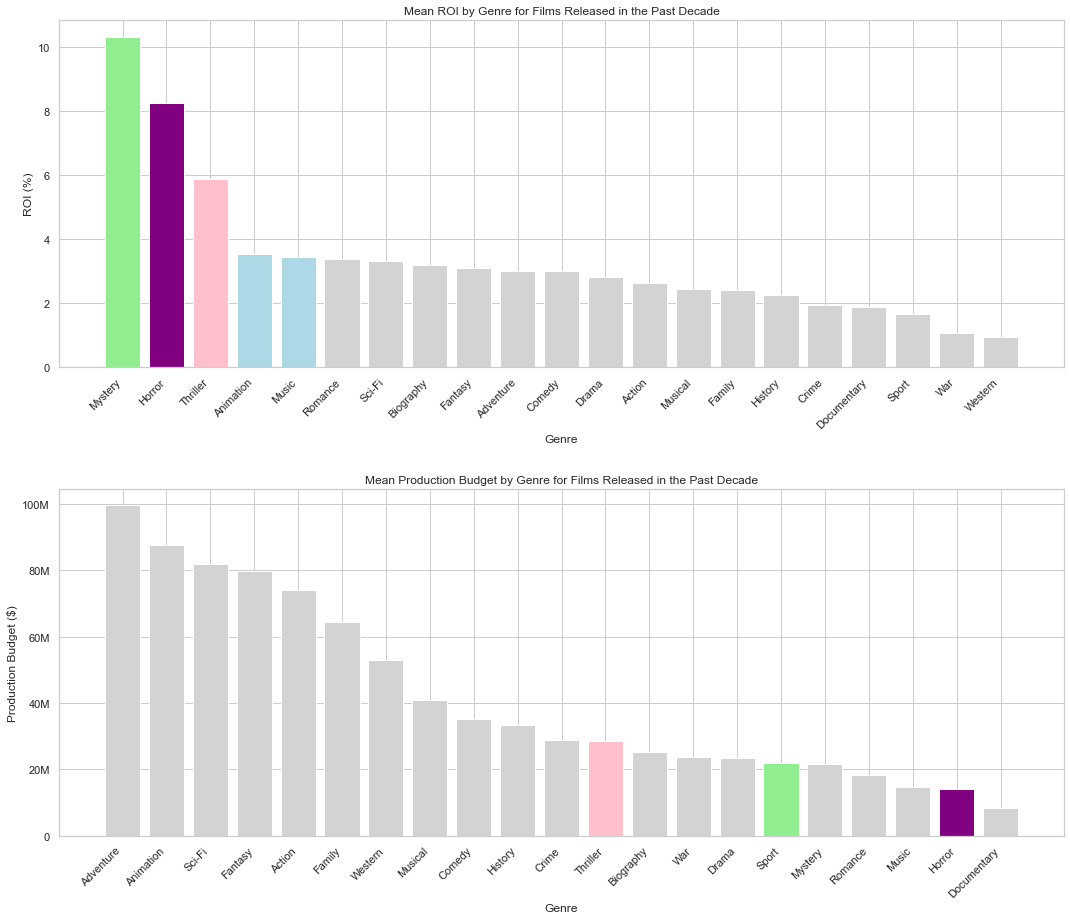

In [867]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,15))

colors_ax1 = ['lightgreen', 'purple', 'pink', 'lightblue', 'lightblue', 'lightgrey', 
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
ax1.bar(x=mean_ROI_by_f_df.index, height=mean_ROI_by_f_df['ROI'], color=colors_ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('ROI (%)')
ax1.set_title('Mean ROI by Genre for Films Released in the Past Decade')

colors_ax2 = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'pink',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgreen', 'lightgrey', 'lightgrey',
              'lightgrey', 'purple', 'lightgrey']
ax2.bar(x=mean_prod_budget_by_f_df.index, height=mean_prod_budget_by_f_df['production_budget'],
        color=colors_ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Production Budget ($)')
ax2.set_title('Mean Production Budget by Genre for Films Released in the Past Decade')
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
y = np.array([0, 20000000, 40000000, 60000000, 80000000, 100000000])
y_ticks_labels = ["0", "20M", "40M", "60M", "80M", "100M"]
ax2.set_yticks(y)
ax2.set_yticklabels(y_ticks_labels)

plt.subplots_adjust(hspace=0.35)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right");
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right");


In [ ]:
finance_df.plot('production_budget', 'worldwide_gross', kind='scatter');

In [ ]:
master_df['production_budget'] = master_df['production_budget'].replace(0,np.NAN)
find_minmax('production_budget')


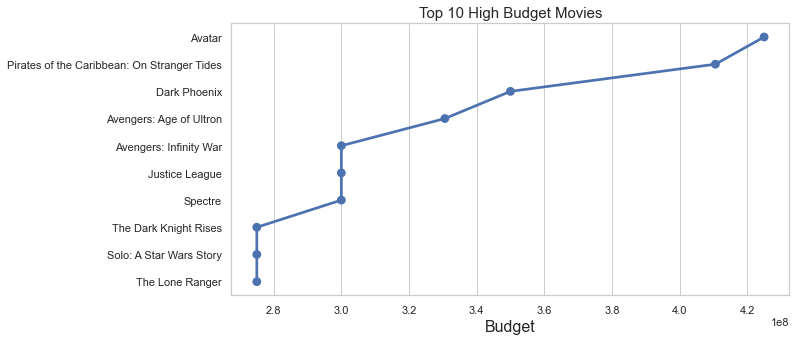

In [670]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(master_df['production_budget'].sort_values(ascending = False))
info['movie'] = master_df['movie']
data = list(map(str,(info['movie'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['production_budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 16)
sns.set_style("darkgrid")

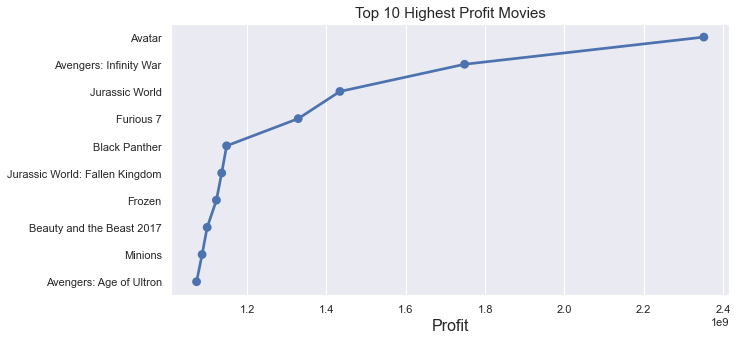

In [674]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(master_df['Profit'].sort_values(ascending = False))
info['movie'] = master_df['movie']
data = list(map(str,(info['movie'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['Profit'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Profit Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 16)
sns.set_style("darkgrid")

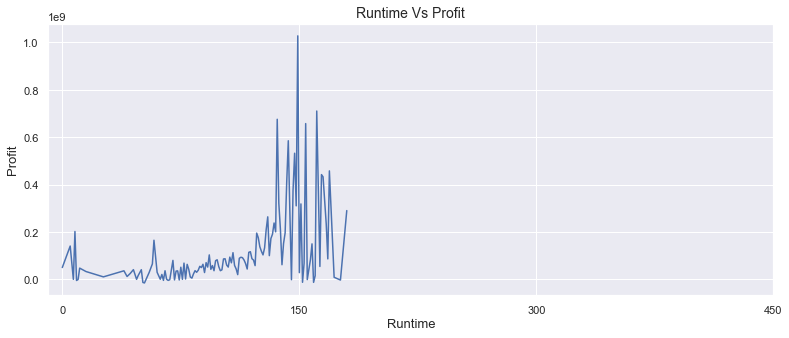

In [675]:
master_df.groupby('runtime')['Profit'].mean().plot(figsize = (13,5),xticks=np.arange(0,500,150))

#setup the title of the figure
plt.title("Runtime Vs Profit",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")